# **0. Вывод графика**

In [ ]:
#@title Функция обработки и отрисовки графика
def graf(df):
  # Загружаем обработанный мапинг (только подшипники) на каждый Эксгаустер
  df_map_Y_171 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 1 (У-171)')
  df_map_Y_172 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 2 (У-172)')
  df_map_F_171 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 3 (Ф-171)')
  df_map_F_172 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 4 (Ф-172)')
  df_map_Х_171 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 5 (X-171)')
  df_map_Х_172 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 6 (X-172)')
###########

  # Отсортируем данные для каждого Эксгаустера из общих данных с kafka
  df_Y_171 = df[df_map_Y_171['Код сигнала в Kafka'].unique()] # Оставляем только уникальные столбцы (сигналы) для Эксгаустера Y 171 в общей базе  
  df_Y_171.insert(0, 'moment', df['moment']) # Ставим столбец даты первым
  df_Y_171['moment'] = pd.to_datetime(df_Y_171['moment']) # Переводим даты из формата кафки в формат datatime 

  df_Y_172 = df[df_map_Y_172['Код сигнала в Kafka'].unique()]
  df_Y_172.insert(0, 'moment', df['moment'])
  df_Y_172['moment'] = pd.to_datetime(df_Y_172['moment'])

  df_F_171 = df[df_map_Y_171['Код сигнала в Kafka'].unique()]
  df_F_171.insert(0, 'moment', df['moment'])
  df_F_171['moment'] = pd.to_datetime(df_F_171['moment'])

  df_F_172 = df[df_map_Y_172['Код сигнала в Kafka'].unique()]
  df_F_172.insert(0, 'moment', df['moment'])
  df_F_172['moment'] = pd.to_datetime(df_F_172['moment'])

  df_X_171 = df[df_map_Y_171['Код сигнала в Kafka'].unique()]
  df_X_171.insert(0, 'moment', df['moment'])
  df_X_171['moment'] = pd.to_datetime(df_X_171['moment'])

  df_X_172 = df[df_map_Y_172['Код сигнала в Kafka'].unique()]
  df_X_172.insert(0, 'moment', df['moment'])
  df_X_172['moment'] = pd.to_datetime(df_X_172['moment'])
###########

  # Переименовываем столбцы на одно название для последующего объекдинения
  df_Y_172.columns = df_Y_171.columns
  df_F_171.columns = df_Y_171.columns
  df_F_172.columns = df_Y_171.columns
  df_X_171.columns = df_Y_171.columns
  df_X_172.columns = df_Y_171.columns
###########

  # Объединяем все столбцы в один df
  df_ag_all = pd.concat([df_Y_171, df_Y_172], ignore_index=True)
  df_ag_all = pd.concat([df_ag_all, df_F_171], ignore_index=True)
  df_ag_all = pd.concat([df_ag_all, df_F_172], ignore_index=True)
  df_ag_all = pd.concat([df_ag_all, df_X_171], ignore_index=True)
  df_ag_all = pd.concat([df_ag_all, df_X_172], ignore_index=True)
###########

  # Загрузим исправленные значения
  df_pok = pd.read_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/Показания_У-171.txt', sep=',')
  
  # Создадим df трейн
  df_t = df_ag_all[df_pok['код сигнала']]
###########

  #Создаём столбец максимальных значений для отказа для тренировочного df (df_t)
  df_alarm_max = pd.read_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/Показания_У-171_alarm_max.txt')
  df_al_max = df_ag_all[df_alarm_max['код сигнала']] # Достаём из общей БД только максимальные значения по отказу

  list_al_max = [] # Создаём пустой лист куда будет ложить средние значения

  for index, row in df_al_max.iterrows(): # Проходимся по строчке значений сигналов
    row = row.mean() # Считаем среднее значение строчки
    list_al_max.append(row) # Добавляем значение в список
  #list_mean
  df_t['alarm_max'] = list_al_max # Создаём новый столбец со средними значениями
###########

  #Создаём столбец минимальных значений для отказа для тренировочного df (df_t)
  df_alarm_min = pd.read_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/Показания_У-171_alarm_min.txt')
  df_al_min = df_ag_all[df_alarm_min['код сигнала']] # Достаём из общей БД только максимальные значения по отказу

  list_al_min = [] # Создаём пустой лист куда будет ложить средние значения

  for index, row in df_al_min.iterrows(): # Проходимся по строчке значений сигналов
    row = row.mean() # Считаем среднее значение строчки
    list_al_min.append(row) # Добавляем значение в список
  #list_mean
  df_t['alarm_min'] = list_al_min # Создаём новый столбец со средними значениями
###########

  # Создаём словарь из значений
  keys = df_pok['код сигнала'].to_list()
  values = df_pok['Название сигнала'].to_list()
  name_sig_dict = dict(zip(keys, values))
  #Переименовываем столбцы согласно словарю
  df_t.rename(columns = name_sig_dict, inplace = True )
###########

  data = np.array(df_t)

  #Отображаем исходные от точки start и длинной stop
  start = 0            #С какой точки начинаем
  #stop = data.shape[0] #Сколько точек отрисуем
  length = 50 #Сколько точек отрисуем

  #Заполняем текстовые названия каналов данных
  chanelNames = df_t.columns# Название столбцов для отрисовки

  #Рисуем все графики данных
  # Показания по столбцам
  plt.figure(figsize=(40,20))
  for i in range(len(df_t.columns)): # количество столбцов в df_t
    #Отрисовываем часть данных
    #От начальной точки, до начальной точки + размер шага отрисовки
    plt.plot(data[start:start+length,i], 
          label=chanelNames[i])
  plt.ylabel('Показания')
  #plt.legend()
  plt.legend(loc='upper left')
  plt.show()
  

In [ ]:
from confluent_kafka import Consumer
from tqdm import tqdm

def graf_online():
  from confluent_kafka import Consumer
  from tqdm import tqdm
  cfg = {
      'bootstrap.servers': 'rc1a-b5e65f36lm3an1d5.mdb.yandexcloud.net:9091',
      'group.id': 'win_win_win',
      'auto.offset.reset': 'earliest',
      'security.protocol': 'SASL_SSL',
      'ssl.ca.location' : 'CA.pem',
      'sasl.username' : '9433_reader',
      'sasl.password': 'eUIpgWu0PWTJaTrjhjQD3.hoyhntiK',
      'sasl.mechanisms':'SCRAM-SHA-512'
  }

  C = Consumer(cfg)
  C.subscribe(['zsmk-9433-dev-01'])

  for _ in range(10):
      msg = C.poll(1)
      if msg:
          dat = {
              'msg_value': msg.value(),
              'msg_headers': msg.headers(),
              'msg_key': msg.key(),
              'msg_partition': msg.partition(),
              'msg_topic': msg.topic(),        
          }
          data = json.loads(msg.value().decode('utf-8'))
          df = pd.DataFrame(data, index=[0])
          graf(df)
          #print(df)
          #print(dat)
  return graf(df)

In [ ]:
graf_online()

UnboundLocalError: ignored

In [ ]:
from confluent_kafka import Consumer

cfg = {
    'bootstrap.servers': '1a-b5e65f36lm3an1d5.mdb.yandexcloud.net:9091', # host = 'rc1a-2ar1hqnl386tvq7k.mdb.yandexcloud.net:9091'
    'group.id': 'win_win_win',
    'auto.offset.reset': 'earliest',
    'security.protocol': 'SASL_SSL',
    'ssl.ca.location' : 'CA.pem',
    'sasl.username' : '9433_reader',
    'sasl.password': 'eUIpgWu0PWTJaTrjhjQD3.hoyhntiK',
    'sasl.mechanisms':'SCRAM-SHA-512'
}

C = Consumer(cfg)
C.subscribe(['zsmk-9433-dev-01'])

#%%time
list_msg = []
for _ in range(5):
    msg = C.poll(1)
    if msg:
        dat = {
            'msg_value': msg.value(),
            'msg_headers': msg.headers(),
            'msg_key': msg.key(),
            'msg_partition': msg.partition(),
            'msg_topic': msg.topic()        
        }
        data_msg = json.loads(msg.value().decode('utf-8'))
        list_msg.append(data_msg)
        df_l = pd.DataFrame(list_msg)
        graf(df_l)
        print('ad')

# **1. Загружаем библиотеки**

https://cloud.yandex.ru/docs/managed-kafka/operations/connect#get-ssl-cert

In [ ]:
!pip install confluent_kafka
from confluent_kafka import Consumer, KafkaError
import pandas as pd
import json
import shutil
from tqdm import tqdm
import numpy as np
file = 'CA.pem'
cert = '/content/drive/MyDrive/ЕВРАЗ_2.0/'
cert_job = '/content/'
shutil.copy(cert + file, cert_job + file)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 42.4 MB/s eta 0:00:00


'/content/CA.pem'

# **2. Скачиваем df за 3 недели**

In [ ]:
from confluent_kafka import Consumer

cfg = {
    'bootstrap.servers': 'rc1a-2ar1hqnl386tvq7k.mdb.yandexcloud.net:9091', # host = 'rc1a-2ar1hqnl386tvq7k.mdb.yandexcloud.net:9091'
    'group.id': 'win_win_win',
    'auto.offset.reset': 'earliest',
    'security.protocol': 'SASL_SSL',
    'ssl.ca.location' : 'CA.pem',
    'sasl.username' : '9433_reader',
    'sasl.password': 'eUIpgWu0PWTJaTrjhjQD3.hoyhntiK',
    'sasl.mechanisms':'SCRAM-SHA-512'
}

C = Consumer(cfg)
C.subscribe(['zsmk-9433-dev-01'])

#%%time
list_msg = []
for _ in tqdm(range(30240)):
    msg = C.poll(1)
    if msg:
        dat = {
            'msg_value': msg.value(),
            'msg_headers': msg.headers(),
            'msg_key': msg.key(),
            'msg_partition': msg.partition(),
            'msg_topic': msg.topic(),        
        }
        data = json.loads(msg.value().decode('utf-8'))
        list_msg.append(data)
        df = pd.DataFrame(list_msg)

In [ ]:
df.to_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/df_exgauster_df3', index=False)

In [ ]:
df

# **3. Обрабатываем полученные данные**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/df_exgauster')
#df_max = pd.read_json('/content/drive/MyDrive/ЕВРАЗ_2.0/exampl_kafka.json')

In [ ]:
'''
# Преобразуем максимальные значения отказа эксгаустера в df
list_max = []
        
for i in df_max['Message'].iloc[:]:
  list_max.append(i)
  df_m = pd.DataFrame(list_max)
  df_m.drop('moment', axis=1, inplace=True) #удаляем столбец с датой
df_m
'''

In [ ]:
# Загружаем обработанный мапинг (только подшипники) на каждый Эксгаустер
df_map_Y_171 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 1 (У-171)')
df_map_Y_172 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 2 (У-172)')
df_map_F_171 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 3 (Ф-171)')
df_map_F_172 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 4 (Ф-172)')
df_map_Х_171 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 5 (X-171)')
df_map_Х_172 = pd.read_excel('/content/drive/MyDrive/ЕВРАЗ_2.0/Маппинг сигналов ред.xlsx', sheet_name='Эксгаустер № 6 (X-172)')

In [ ]:
# Отсортируем данные для каждого Эксгаустера из общих данных с kafka
df_Y_171 = df[df_map_Y_171['Код сигнала в Kafka'].unique()] # Оставляем только уникальные столбцы (сигналы) для Эксгаустера Y 171 в общей базе
df_Y_171.insert(0, 'moment', df['moment']) # Ставим столбец даты первым
df_Y_171['moment'] = pd.to_datetime(df_Y_171['moment']) # Переводим даты из формата кафки в формат datatime 
#df_Y_171['hour'] = df_Y_171['moment'].dt.hour # Достаём для каждой строчки часы

df_Y_172 = df[df_map_Y_172['Код сигнала в Kafka'].unique()]
df_Y_172.insert(0, 'moment', df['moment'])
df_Y_172['moment'] = pd.to_datetime(df_Y_172['moment'])
#df_Y_172['hour'] = df_Y_172['moment'].dt.hour


df_F_171 = df[df_map_Y_171['Код сигнала в Kafka'].unique()]
df_F_171.insert(0, 'moment', df['moment'])
df_F_171['moment'] = pd.to_datetime(df_F_171['moment'])
#df_F_171['hour'] = df_F_171['moment'].dt.hour


df_F_172 = df[df_map_Y_172['Код сигнала в Kafka'].unique()]
df_F_172.insert(0, 'moment', df['moment'])
df_F_172['moment'] = pd.to_datetime(df_F_172['moment'])
#df_F_172['hour'] = df_F_172['moment'].dt.hour


df_X_171 = df[df_map_Y_171['Код сигнала в Kafka'].unique()]
df_X_171.insert(0, 'moment', df['moment'])
df_X_171['moment'] = pd.to_datetime(df_X_171['moment'])
#df_X_171['hour'] = df_X_171['moment'].dt.hour


df_X_172 = df[df_map_Y_172['Код сигнала в Kafka'].unique()]
df_X_172.insert(0, 'moment', df['moment'])
df_X_172['moment'] = pd.to_datetime(df_X_172['moment'])
#df_X_172['hour'] = df_X_172['moment'].dt.hour

#df_m = df_m[df_Y_171.columns] # оставляем толко максимальные значения по сигналам для эксгаустера № У-171

<ipython-input-4-b79dbc934445>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_171['moment'] = pd.to_datetime(df_Y_171['moment']) # Переводим даты из формата кафки в формат datatime
<ipython-input-4-b79dbc934445>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_172['moment'] = pd.to_datetime(df_Y_172['moment'])
<ipython-input-4-b79dbc934445>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

**Объединяем df по всем агрегатам с изменением имени колонок**

In [ ]:
# Переименовываем столбцы на одно название для последующего объекдинения
df_Y_172.columns = df_Y_171.columns
df_F_171.columns = df_Y_171.columns
df_F_172.columns = df_Y_171.columns
df_X_171.columns = df_Y_171.columns
df_X_172.columns = df_Y_171.columns

# Объединяем все столбцы в один df
df_ag_all = pd.concat([df_Y_171, df_Y_172], ignore_index=True)
df_ag_all = pd.concat([df_ag_all, df_F_171], ignore_index=True)
df_ag_all = pd.concat([df_ag_all, df_F_172], ignore_index=True)
df_ag_all = pd.concat([df_ag_all, df_X_171], ignore_index=True)
df_ag_all = pd.concat([df_ag_all, df_X_172], ignore_index=True)

df_ag_all

moment  SM_Exgauster\[2:27]  SM_Exgauster\[2:65]  \
0     2023-01-29 05:38:25.125007            60.899994                 75.0   
1     2023-01-29 05:39:25.125007            60.899994                 75.0   
2     2023-01-29 05:40:25.125007            60.899994                 75.0   
3     2023-01-29 05:41:25.125007            60.899994                 75.0   
4     2023-01-29 05:42:25.125007            60.899994                 75.0   
...                          ...                  ...                  ...   
40075 2023-02-02 23:01:25.599340            53.099998                 75.0   
40076 2023-02-02 23:02:25.599340            53.099998                 75.0   
40077 2023-02-02 23:03:25.599340            53.099998                 75.0   
40078 2023-02-02 23:04:25.599340            53.099998                 75.0   
40079 2023-02-02 23:05:25.599340            53.099998                 75.0   

       SM_Exgauster\[2:74]  SM_Exgauster\[2:83]  SM_Exgauster\[2:92]  \
0                      0.0                 65.0                  0.0   
1                      0.0                 65.0                  0.0   
2                      0.0                 65.0                  0.0   
3                      0.0                 65.0                  0.0   
4                      0.0                 65.0                  0.0   
...                    ...                  ...                  ...   
40075                  0.0                 65.0                  0.0   
40076                  0.0                 65.0                  0.0   
40077                  0.0                 65.0                  0.0   
40078                  0.0                 65.0                  0.0   
40079                  0.0                 65.0                  0.0   

       SM_Exgauster\[2:2]  SM_Exgauster\[2:139]  SM_Exgauster\[2:151]  \
0                0.347222                   7.1                   0.0   
1                0.347222                   7.1                   0.0   
2                0.347222                   7.1                   0.0   
3                0.347222                   7.1                   0.0   
4                0.347222                   7.1                   0.0   
...                   ...                   ...                   ...   
40075            2.262732                   7.1                   0.0   
40076            2.297454                   7.1                   0.0   
40077            2.280092                   7.1                   0.0   
40078            2.355324                   7.1                   0.0   
40079            2.285880                   7.1                   0.0   

       SM_Exgauster\[2:163]  ...  SM_Exgauster\[2:10]  SM_Exgauster\[2:147]  \
0                       4.5  ...             0.873843                   7.1   
1                       4.5  ...             0.873843                   7.1   
2                       4.5  ...             0.891204                   7.1   
3                       4.5  ...             0.920139                   7.1   
4                       4.5  ...             0.920139                   7.1   
...                     ...  ...                  ...                   ...   
40075                   4.5  ...             0.555556                  10.0   
40076                   4.5  ...             0.561343                  10.0   
40077                   4.5  ...             0.572917                  10.0   
40078                   4.5  ...             0.549769                  10.0   
40079                   4.5  ...             0.578704                  10.0   

       SM_Exgauster\[2:159]  SM_Exgauster\[2:171]  SM_Exgauster\[2:183]  \
0                       0.0                   4.5                   0.0   
1                       0.0                   4.5                   0.0   
2                       0.0                   4.5                   0.0   
3                       0.0                   4.5                   0.0   
4                      

In [ ]:
# Загрузим исправленные значения
df_pok = pd.read_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/Показания_У-171.txt', sep=',')
df_pok.head(2)

Название сигнала          код сигнала
0  Подшипник 1_Температура нагрева  SM_Exgauster\[2:27]
1      Подшипник 1_Вибрация_Осевая   SM_Exgauster\[2:2]

In [ ]:
# Создадим df трейн
df_t = df_ag_all[df_pok['код сигнала']]
df_t

SM_Exgauster\[2:27]  SM_Exgauster\[2:2]  SM_Exgauster\[2:0]  \
0                60.899994            0.347222            0.607639   
1                60.899994            0.347222            0.590278   
2                60.899994            0.347222            0.619213   
3                60.899994            0.347222            0.619213   
4                60.899994            0.347222            0.636574   
...                    ...                 ...                 ...   
40075            53.099998            2.262732            1.226852   
40076            53.099998            2.297454            1.238426   
40077            53.099998            2.280092            1.244213   
40078            53.099998            2.355324            1.255787   
40079            53.099998            2.285880            1.250000   

       SM_Exgauster\[2:1]  SM_Exgauster\[2:28]  SM_Exgauster\[2:5]  \
0                0.266204            64.900002            0.613426   
1                0.266204            64.900002            0.619213   
2                0.271991            65.000000            0.561343   
3                0.283565            65.000000            0.642361   
4                0.271991            64.900002            0.561343   
...                   ...                  ...                 ...   
40075            1.730324            63.199997            1.718750   
40076            1.759259            63.199997            1.741898   
40077            1.770833            63.199997            1.747685   
40078            1.822917            63.199997            1.788194   
40079            1.736111            63.199997            1.765046   

       SM_Exgauster\[2:3]  SM_Exgauster\[2:4]  SM_Exgauster\[2:29]  \
0                0.833471            0.561343            46.100006   
1                0.845427            0.555556            46.100006   
2                0.838668            0.543981            46.100006   
3                0.831118            0.561343            46.100006   
4                0.840767            0.555556            46.100006   
...                   ...                 ...                  ...   
40075            1.053241            1.412037            46.900002   
40076            1.070602            1.423611            46.900002   
40077            1.064815            1.423611            47.000000   
40078            1.076389            1.475694            47.000000   
40079            1.076389            1.452546            47.000000   

       SM_Exgauster\[2:30]  ...  SM_Exgauster\[2:32]  SM_Exgauster\[2:33]  \
0                48.299995  ...            38.500000            34.799995   
1                48.299995  ...            38.500000            34.799995   
2                48.299995  ...            38.500000            34.799995   
3                48.299995  ...            38.500000            34.799995   
4                48.299995  ...            38.500000            34.799995   
...                    ...  ...                  ...                  ...   
40075            45.500000  ...            37.199997            32.800003   
40076            45.500000  ...            37.199997            32.800003   
40077            45.500000  ...            37.099998            32.800003   
40078            45.500000  ...            37.099998            32.800003   
40079            45.500000  ...            37.099998            32.800003   

       SM_Exgauster\[2:8]  SM_Exgauster\[2:6]  SM_Exgauster\[2:7]  \
0                2.228009            1.585648            2.138431   
1                2.210648            1.574074            2.153891   
2                2.222222            1.585648            2.133563   
3                2.199074            1.585648            2.143919   
4                2.251158            1.591435            2.148230   
...                   ...                 ...                 ...   
40075            0.439815            0.578704            0.665509   
40076  

**Создаём столбец средних значений для тренировочного df (df_t)**

In [ ]:
list_mean = [] # Создаём пустой лист куда будет ложить средние значения

for index, row in df_t.iterrows(): # Проходимся по строчке значений сигналов
    row = row.mean() # Считаем среднее значение строчки
    list_mean.append(row) # Добавляем значение в список
#list_mean
df_t['mean'] = list_mean # Создаём новый столбец со средними значениями

<ipython-input-8-3eca2fe6db11>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['mean'] = list_mean # Создаём новый столбец со средними значениями


**Создаём столбец максимальных значений для отказа для тренировочного df (df_t)**

In [ ]:

df_alarm_max = pd.read_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/Показания_У-171_alarm_max.txt')
df_al_max = df_ag_all[df_alarm_max['код сигнала']] # Достаём из общей БД только максимальные значения по отказу

list_al_max = [] # Создаём пустой лист куда будет ложить средние значения

for index, row in df_al_max.iterrows(): # Проходимся по строчке значений сигналов
    row = row.mean() # Считаем среднее значение строчки
    list_al_max.append(row) # Добавляем значение в список
#list_mean
df_t['alarm_max'] = list_al_max # Создаём новый столбец со средними значениями


<ipython-input-9-c3db1a619067>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['alarm_max'] = list_al_max # Создаём новый столбец со средними значениями


**Создаём столбец минимальных значений для отказа для тренировочного df (df_t)**

In [ ]:

df_alarm_min = pd.read_csv('/content/drive/MyDrive/ЕВРАЗ_2.0/Показания_У-171_alarm_min.txt')
df_al_min = df_ag_all[df_alarm_min['код сигнала']] # Достаём из общей БД только максимальные значения по отказу

list_al_min = [] # Создаём пустой лист куда будет ложить средние значения

for index, row in df_al_min.iterrows(): # Проходимся по строчке значений сигналов
    row = row.mean() # Считаем среднее значение строчки
    list_al_min.append(row) # Добавляем значение в список
#list_mean
df_t['alarm_min'] = list_al_min # Создаём новый столбец со средними значениями


<ipython-input-10-3edc7263902b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['alarm_min'] = list_al_min # Создаём новый столбец со средними значениями


**Добавляем столбец с временем**

In [ ]:
#Добавляем время к тренировочному df 
df_t.insert(0, 'moment', df_ag_all['moment'])
df_t.head()

moment  SM_Exgauster\[2:27]  SM_Exgauster\[2:2]  \
0 2023-01-29 05:38:25.125007            60.899994            0.347222   
1 2023-01-29 05:39:25.125007            60.899994            0.347222   
2 2023-01-29 05:40:25.125007            60.899994            0.347222   
3 2023-01-29 05:41:25.125007            60.899994            0.347222   
4 2023-01-29 05:42:25.125007            60.899994            0.347222   

   SM_Exgauster\[2:0]  SM_Exgauster\[2:1]  SM_Exgauster\[2:28]  \
0            0.607639            0.266204            64.900002   
1            0.590278            0.266204            64.900002   
2            0.619213            0.271991            65.000000   
3            0.619213            0.283565            65.000000   
4            0.636574            0.271991            64.900002   

   SM_Exgauster\[2:5]  SM_Exgauster\[2:3]  SM_Exgauster\[2:4]  \
0            0.613426            0.833471            0.561343   
1            0.619213            0.845427            0.555556   
2            0.561343            0.838668            0.543981   
3            0.642361            0.831118            0.561343   
4            0.561343            0.840767            0.555556   

   SM_Exgauster\[2:29]  ...  SM_Exgauster\[2:6]  SM_Exgauster\[2:7]  \
0            46.100006  ...            1.585648            2.138431   
1            46.100006  ...            1.574074            2.153891   
2            46.100006  ...            1.585648            2.133563   
3            46.100006  ...            1.585648            2.143919   
4            46.100006  ...            1.591435            2.148230   

   SM_Exgauster\[2:34]  SM_Exgauster\[2:11]  SM_Exgauster\[2:9]  \
0            39.700005             2.557870            1.660880   
1            39.600006             2.540509            1.649306   
2            39.600006             2.494213            1.689815   
3            39.700005             2.500000            1.684028   
4            39.700005             2.517361            1.684028   

   SM_Exgauster\[2:10]  SM_Exgauster\[2:35]       mean  alarm_max  alarm_min  
0             0.873843            39.200005  20.246380       36.2    0.47619  
1             0.873843            39.200005  20.234580       36.2    0.47619  
2             0.891204            39.200005  20.238052       36.2    0.47619  
3             0.920139            39.200005  20.248459       36.2    0.47619  
4             0.920139            39.300003  20.248848       36.2    0.47619  

[5 rows x 25 columns]

**Перевод к среднему за 1 час промежуток времени**

In [ ]:
d_t_hour = df_t.resample('60T', on='moment').mean() # Приводим df к средним значениям за час
d_t_hour.reset_index(inplace=True) # Сбрасываем индексы

#Переименуем колонки 
# Создаём словарь из значений
keys = df_pok['код сигнала'].to_list()
values = df_pok['Название сигнала'].to_list()
name_sig_dict = dict(zip(keys, values))
#Переименовываем столбцы согласно словарю
d_t_hour.rename(columns = name_sig_dict, inplace = True )
d_t_hour

moment  Подшипник 1_Температура нагрева  \
0   2023-01-29 05:00:00                        56.695453   
1   2023-01-29 06:00:00                        56.746610   
2   2023-01-29 07:00:00                        56.843102   
3   2023-01-29 08:00:00                        56.921668   
4   2023-01-29 09:00:00                        56.965834   
..                  ...                              ...   
110 2023-02-02 19:00:00                        58.449152   
111 2023-02-02 20:00:00                        58.526724   
112 2023-02-02 21:00:00                        58.337501   
113 2023-02-02 22:00:00                        58.099137   
114 2023-02-02 23:00:00                        57.999996   

     Подшипник 1_Вибрация_Осевая  Подшипник 1_Вибрация_Горизонтальная  \
0                       1.448075                             0.895412   
1                       1.451909                             0.894882   
2                       1.455739                             0.894097   
3                       1.455295                             0.889130   
4                       1.456935                             0.895930   
..                           ...                                  ...   
110                     1.371822                             0.935587   
111                     1.376118                             0.939196   
112                     1.363137                             0.934221   
113                     1.340397                             0.942638   
114                     1.331018                             0.955826   

     Подшипник 1_Вибрация_Вертикальная  Подшипник 2_Температура нагрева  \
0                             1.049427                        63.563638   
1                             1.050249                        63.626270   
2                             1.052842                        63.606895   
3                             1.053241                        63.662501   
4                             1.053819                        63.680002   
..                                 ...                              ...   
110                           1.042549                        60.638137   
111                           1.044760                        60.697416   
112                           1.036699                        60.548335   
113                           1.028646                        60.134485   
114                           1.026235                        59.850002   

     Подшипник 2_Вибрация_Осевая  Подшипник 2_Вибрация_Горизонтальная  \
0                       1.338910                             0.949593   
1                       1.342691                             0.954439   
2                       1.327476                             0.950428   
3                       1.328511                             0.950168   
4                       1.317805                             0.954277   
..                           ...                                  ...   
110                     1.028572                             0.956289   
111                     1.030891                             0.959124   
112                     1.015770                             0.955153   
113                     0.990032                             0.958871   
114                     0.978009                             0.966418   

     Подшипник 2_Вибрация_Вертикальная  Подшипник 3_Температура нагрева  ...  \
0                             1.007339                        45.186365  ...   
1                             1.011604                        45.141526  ...   
2                             1.012183                        45.087068  ...   
3                             1.015191                        45.102499  ...   
4                             1.022714                        45.068333  ...   
..                                 ...                              ...  ...   
110                           1.053731                        48.121183  ...   
1

# **4. Подготовка данных для НС и обучение**

In [ ]:
#Загружаем библиотеки

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов
import numpy as np # Подключаем numpy
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Подлкючаем модуль TimeseriesGenerator

import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline
import matplotlib.pyplot as plt # Подключаем matplotlib
import numpy as np # Подключаем numpy
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
#d_t_hour.drop('moment', axis=1).columns

**Отобразим график мониторинга по деталям**

In [ ]:
data = np.array(d_t_hour.drop(['moment','alarm_max','alarm_min'], axis=1)) #.drop('moment', axis=1)

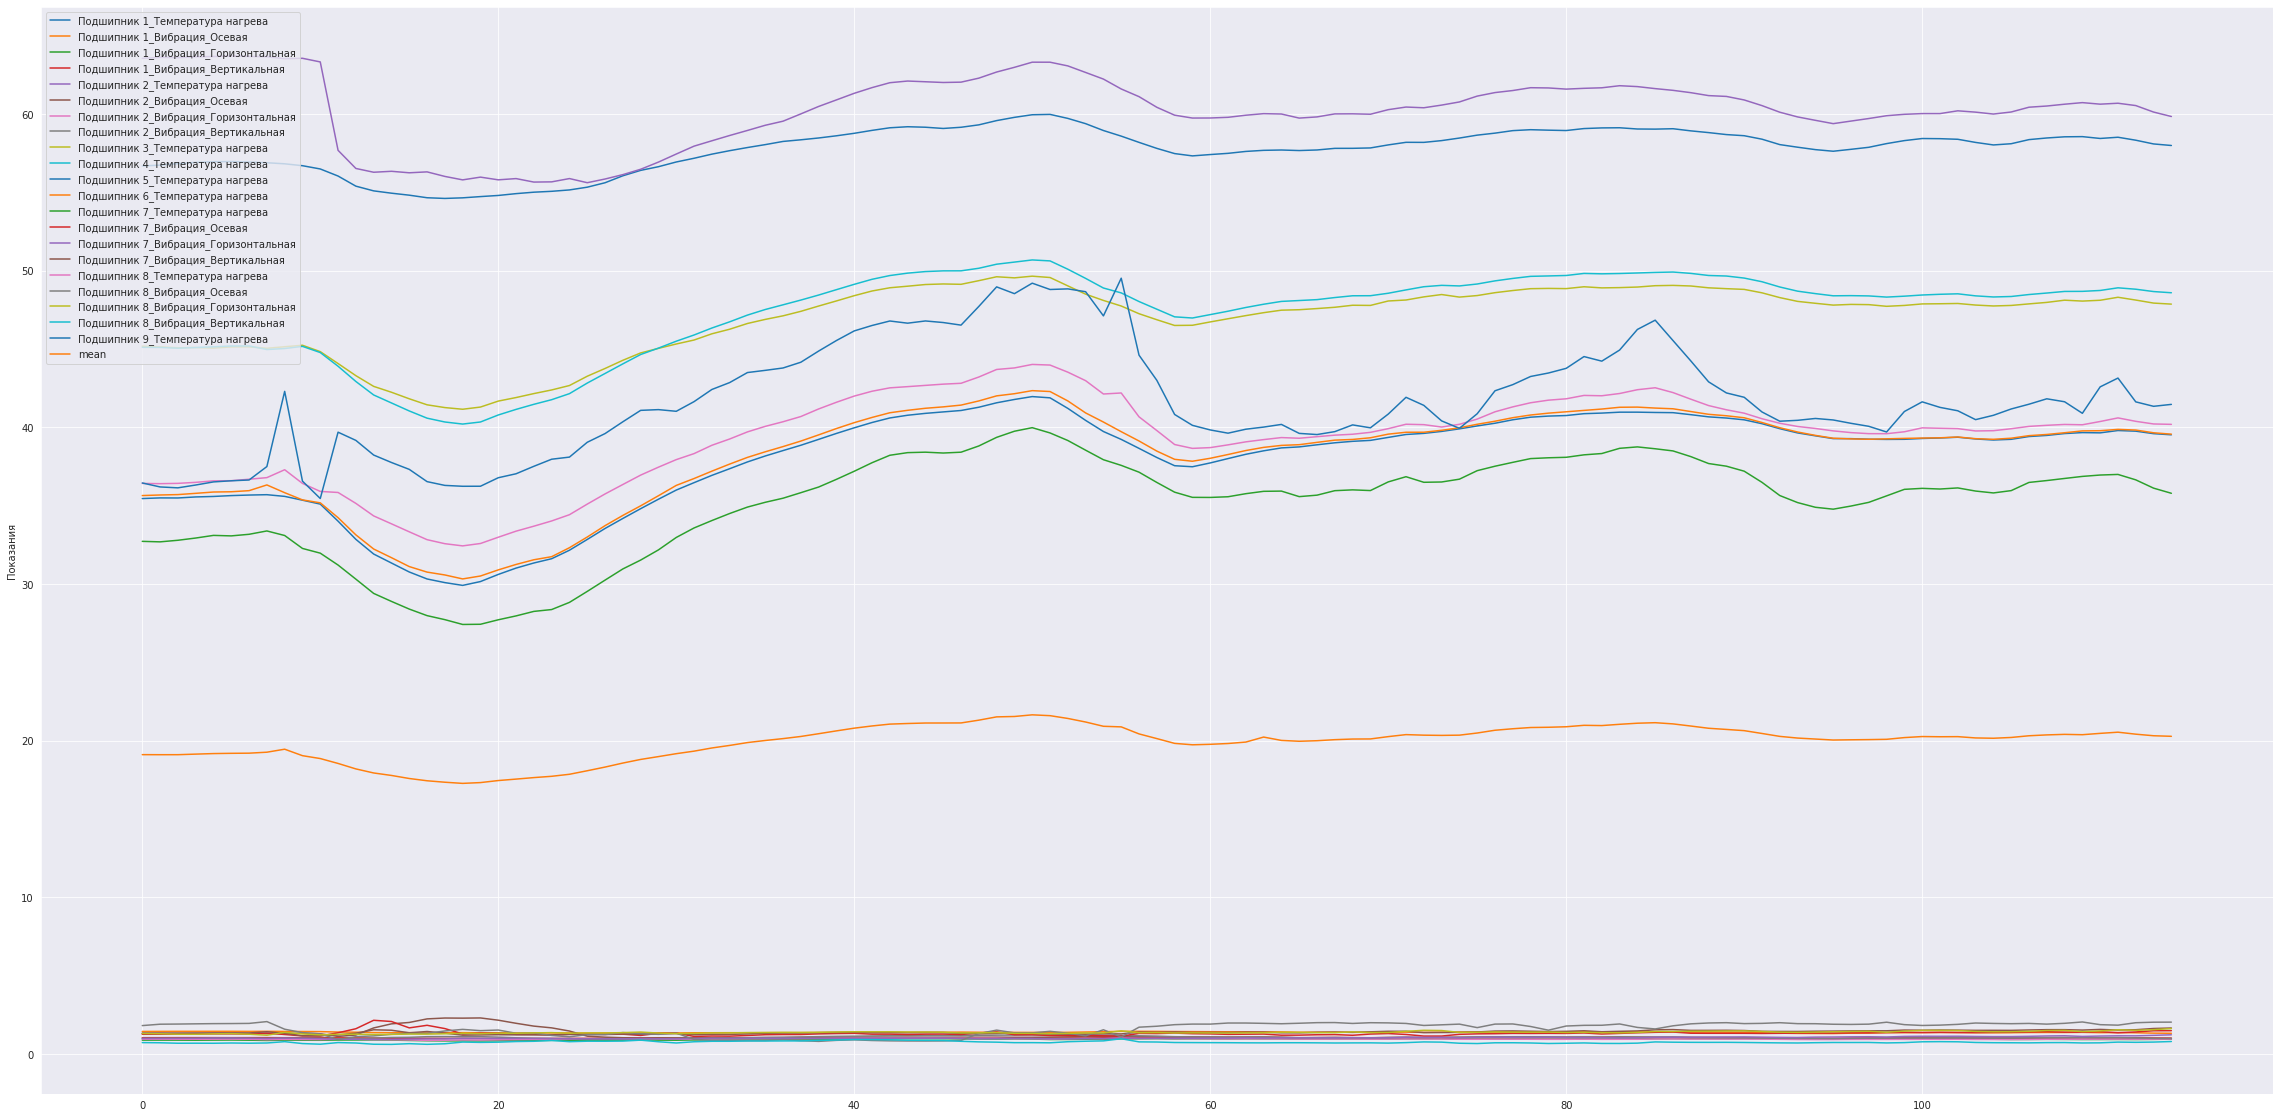

In [ ]:
#Отображаем исходные от точки start и длинной stop
start = 0            #С какой точки начинаем
#stop = data.shape[0] #Сколько точек отрисуем
length = 115 #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = d_t_hour.drop('moment', axis=1).columns#['Open', 'Max', 'Min', 'Close', 'Volume']

#Рисуем все графики данных
#ЧЕтыре основных канала - open, max, min, close
plt.figure(figsize=(40,20))
for i in range(data.shape[1]):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[start:start+length,i], 
          label=chanelNames[i])
plt.ylabel('Показания')
plt.legend(loc='upper left')
plt.show()

#Канал volume
#plt.figure(figsize=(22,6))
#plt.bar(x=np.arange(length), height=data[start:start+length,4], label="Volume")
#plt.legend()
#plt.show()

**Отобразим среднее значения по датчикам в коридоре максимальных и минимальных значений для остановки**

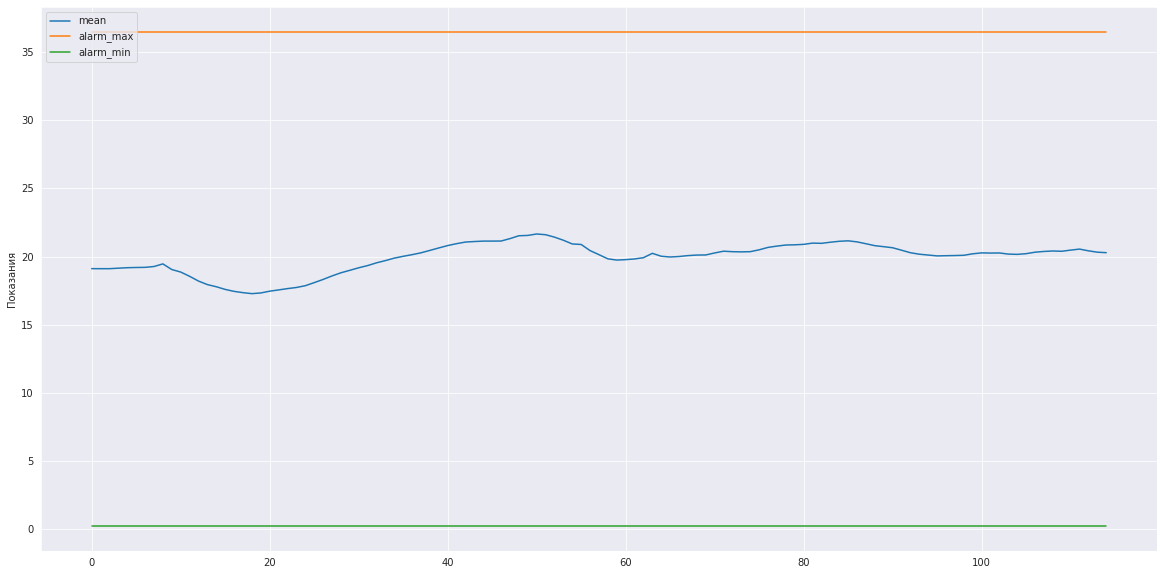

In [ ]:
# Отобразим среднее значение в коридоре min max значений по отказу
data_mean = np.array(d_t_hour[['mean',	'alarm_max',	'alarm_min']])
plt.figure(figsize=(20,10))
#for i in range(data_mean.shape[1]):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
plt.plot(d_t_hour['mean'], 
          label= 'mean')
plt.plot(d_t_hour['alarm_max'], 
          label= 'alarm_max')
plt.plot(d_t_hour['alarm_min'], 
          label= 'alarm_min')
plt.ylabel('Показания')
plt.legend(loc='upper left')
plt.show()

### Функция загрузки данных




In [ ]:
data = np.array(d_t_hour.drop(['moment','alarm_max','alarm_min'], axis=1)) #.drop('moment', axis=1)

In [ ]:
#Формируем параметры загрузки данных

xLen = 10                      #Анализируем по 10 прошедшим точкам 
valLen = 60                 #Используем 60 записей для проверки

trainLen = data.shape[0]-valLen # Размер тренировочной выборки

#Делим данные на тренировочную и тестовую выборки 
xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:] # Обучаем предсказанию на два шага вперед

#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

#Делаем reshape,т.к. у нас только один столбец по одному значению
yTrain, yTest = np.reshape(data[:trainLen,21],(-1,1)), np.reshape(data[trainLen+xLen+2:,21],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=20)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=20)

In [ ]:
xTest.shape

(48, 22)

In [ ]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(20, 10, 22) (20, 1)


## Визуализация результатов


In [ ]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Входные значения')
  plt.xlabel('Часы')
  plt.ylabel('Среднее значение входящих данных')
  plt.legend()
  plt.show()
  
# Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

# Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import  # Подлкючаем модуль TimeseriesGenerator
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=10, sampling_rate=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

## Dense-сетка

### Эксп. №1

In [ ]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(150,input_shape = (xLen,22), activation="relu" )) # 22 - количество каналов (столбцов)
modelD.add(Flatten())
modelD.add(Dense(1, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 150)           3450      
                                                                 
 flatten (Flatten)           (None, 1500)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 4,951
Trainable params: 4,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
3/3 [==============================] - 1s 93ms/step - loss: 0.0796 - val_loss: 0.0621
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.1191 - val_loss: 0.2874
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.1034 - val_loss: 0.0661
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0199 - val_loss: 0.0190
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0630 - val_loss: 0.0636
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0327 - val_loss: 0.0177
Epoch 7/50
3/3 [==============================] - 0s 27ms/step - loss: 0.0099 - val_loss: 0.0226
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0177 - val_loss: 0.0378
Epoch 9/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0148 - val_loss: 0.0106
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0032 - val_loss: 0.0254
Epoch 11/50
3/3 [============

In [ ]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
3/3 [==============================] - 1s 67ms/step - loss: 0.0043 - val_loss: 0.0224
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0127 - val_loss: 0.0713
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0111 - val_loss: 0.0157
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0087 - val_loss: 0.0173
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0020 - val_loss: 0.0185
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0039 - val_loss: 0.0193
Epoch 8/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 0.0127
Epoch 9/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0137
Epoch 10/50
3/3 [==============================] - 0s 18ms/step - loss: 9.8837e-04 - val_loss: 0.0145
Epoch 11/50
3/3 [========

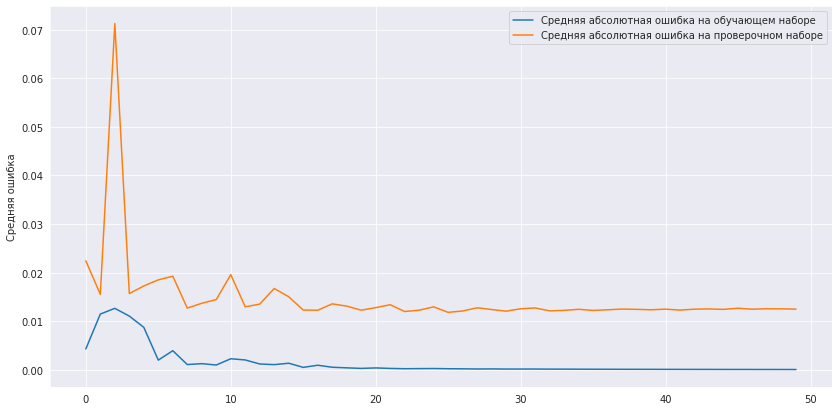

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-6))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
3/3 [==============================] - 1s 74ms/step - loss: 0.0062 - val_loss: 0.0125
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0049 - val_loss: 0.0220
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0032 - val_loss: 0.0134
Epoch 4/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0015 - val_loss: 0.0162
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 8.1408e-04 - val_loss: 0.0143
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 3.5405e-04 - val_loss: 0.0121
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 6.5366e-04 - val_loss: 0.0154
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 6.6158e-04 - val_loss: 0.0128
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 2.2976e-04 - val_loss: 0.0106
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 4.0983e-04 - val_loss: 0.0136
Epoch

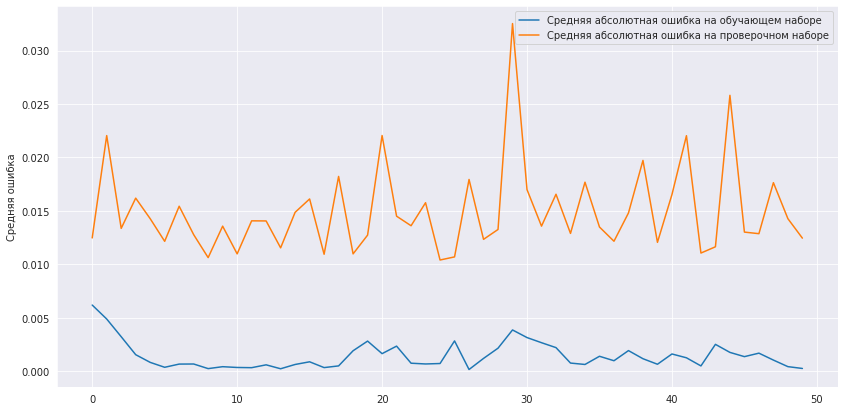

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

2/2 [==============================] - 0s 4ms/step


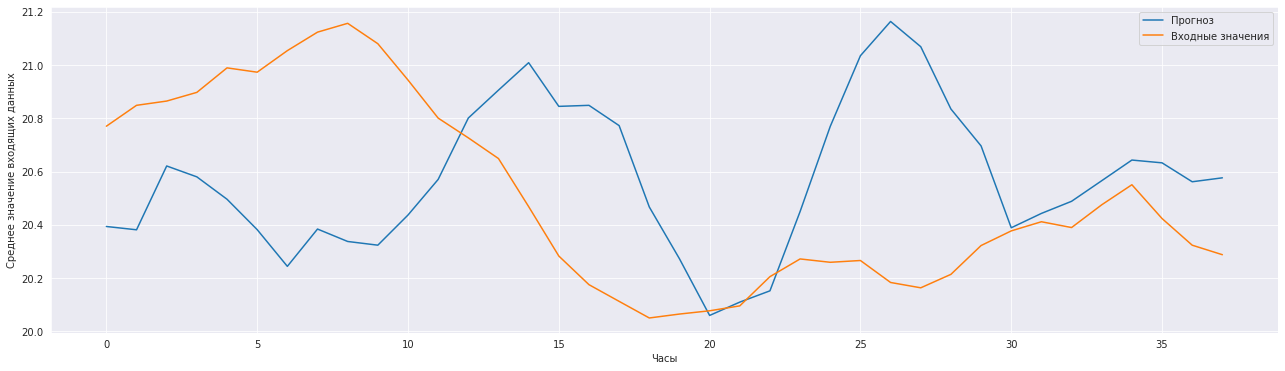

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 105, 0, predVal, yValUnscaled)


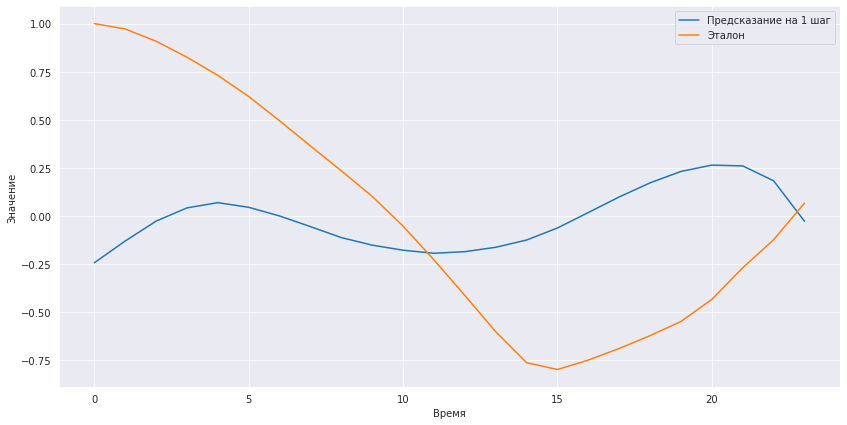

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только mean
#Проверяем корреляцию на глубину 24 шага
showCorr([0], 24, predVal, yValUnscaled)

2/2 [==============================] - 0s 4ms/step


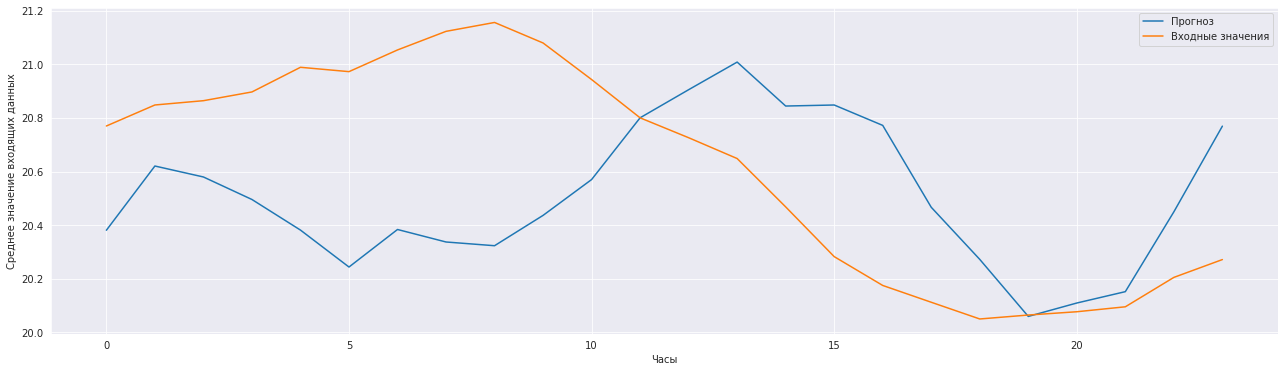

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 24, 0, predVal[1:], yValUnscaled[:-1])


### Эксп. №2

In [ ]:
#Создаём нейронку
modelD_2 = Sequential()
modelD_2.add(Flatten(input_shape = (xLen,22)))
modelD_2.add(Dense(150, activation="relu" )) # 22 - количество каналов
modelD_2.add(Dense(1, activation="linear"))

#Компилируем
modelD_2.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 220)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               33150     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 33,301
Trainable params: 33,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD_2.fit(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/20
3/3 [==============================] - 1s 63ms/step - loss: 0.5364 - val_loss: 0.2316
Epoch 2/20
3/3 [==============================] - 0s 25ms/step - loss: 0.5881 - val_loss: 1.3243
Epoch 3/20
3/3 [==============================] - 0s 17ms/step - loss: 0.6152 - val_loss: 0.1159
Epoch 4/20
3/3 [==============================] - 0s 23ms/step - loss: 0.0888 - val_loss: 0.2726
Epoch 5/20
3/3 [==============================] - 0s 28ms/step - loss: 0.2355 - val_loss: 0.5208
Epoch 6/20
3/3 [==============================] - 0s 21ms/step - loss: 0.1858 - val_loss: 0.0964
Epoch 7/20
3/3 [==============================] - 0s 25ms/step - loss: 0.0347 - val_loss: 0.0348
Epoch 8/20
3/3 [==============================] - 0s 21ms/step - loss: 0.0623 - val_loss: 0.1023
Epoch 9/20
3/3 [==============================] - 0s 20ms/step - loss: 0.0855 - val_loss: 0.0296
Epoch 10/20
3/3 [==============================] - 0s 20ms/step - loss: 0.0208 - val_loss: 0.0406
Epoch 11/20
3/3 [============

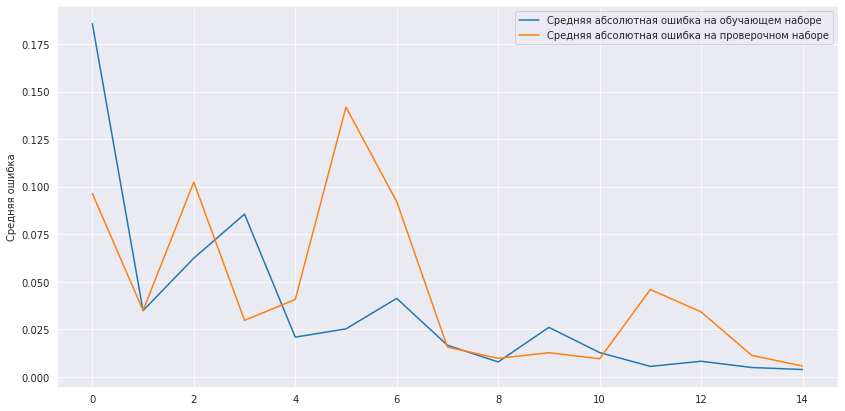

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][5:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][5:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


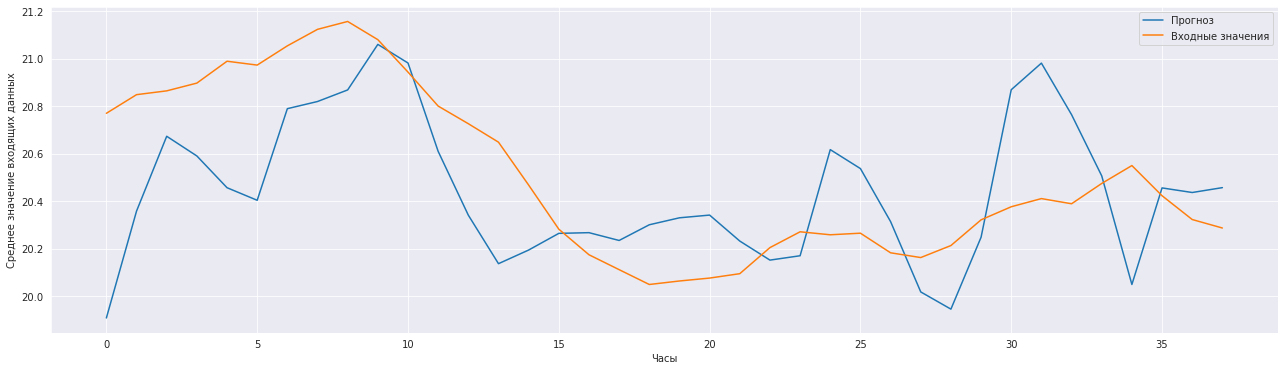

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelD_2, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


2/2 [==============================] - 0s 6ms/step


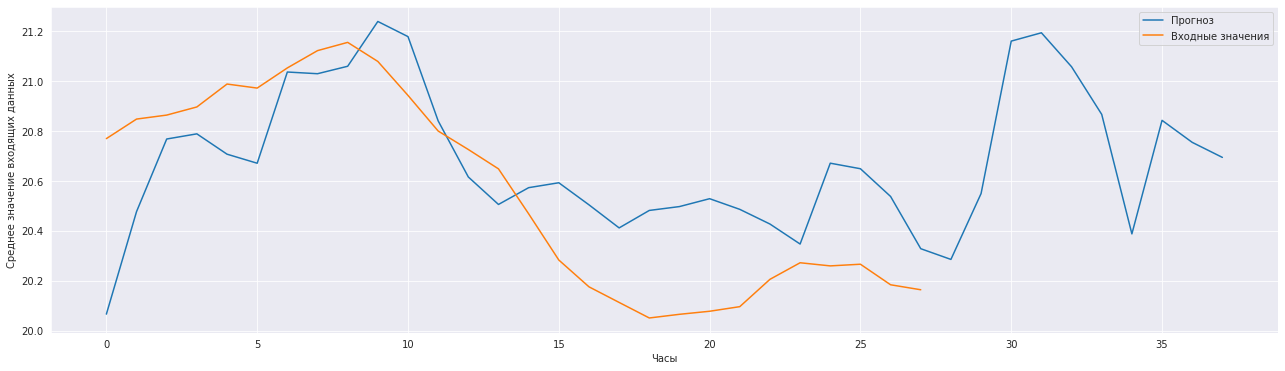

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelD_2, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled[:-10])

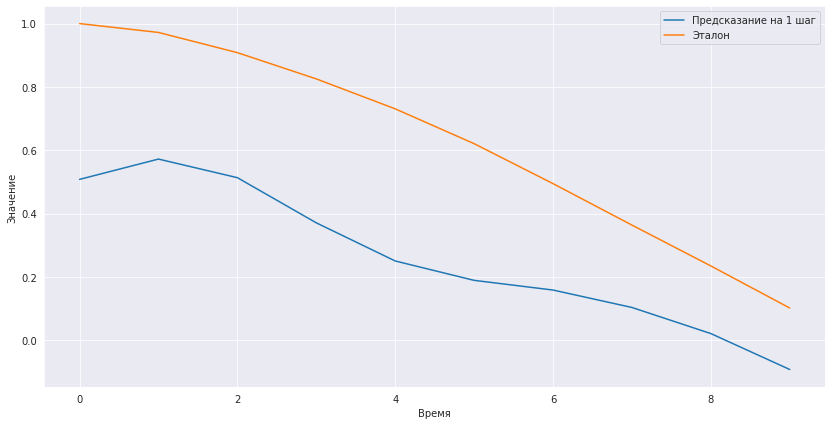

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 10, predVal, yValUnscaled)

In [ ]:
modelD_2.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
history = modelD_2.fit(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/20
3/3 [==============================] - 1s 74ms/step - loss: 0.1187 - val_loss: 0.0969
Epoch 2/20
3/3 [==============================] - 0s 23ms/step - loss: 0.2335 - val_loss: 0.0047
Epoch 3/20
3/3 [==============================] - 0s 21ms/step - loss: 0.0973 - val_loss: 0.7483
Epoch 4/20
3/3 [==============================] - 0s 22ms/step - loss: 0.2111 - val_loss: 0.2662
Epoch 5/20
3/3 [==============================] - 0s 24ms/step - loss: 0.0225 - val_loss: 0.0153
Epoch 6/20
3/3 [==============================] - 0s 21ms/step - loss: 0.0628 - val_loss: 0.1164
Epoch 7/20
3/3 [==============================] - 0s 21ms/step - loss: 0.0872 - val_loss: 0.0092
Epoch 8/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0163 - val_loss: 0.0767
Epoch 9/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0459 - val_loss: 0.0909
Epoch 10/20
3/3 [==============================] - 0s 18ms/step - loss: 0.0103 - val_loss: 0.0059
Epoch 11/20
3/3 [============

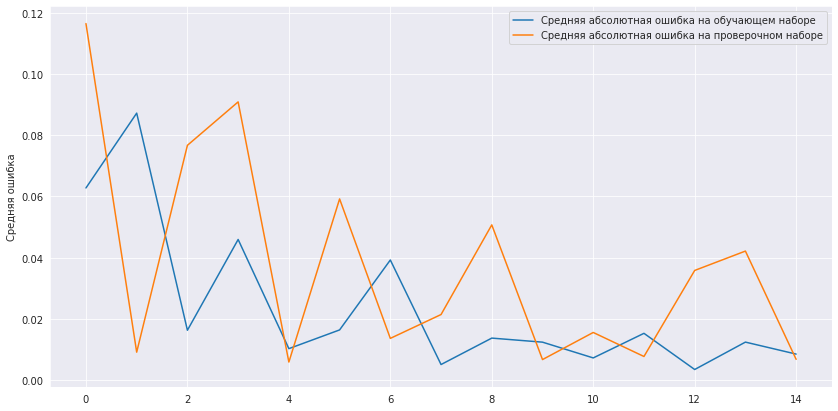

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][5:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][5:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


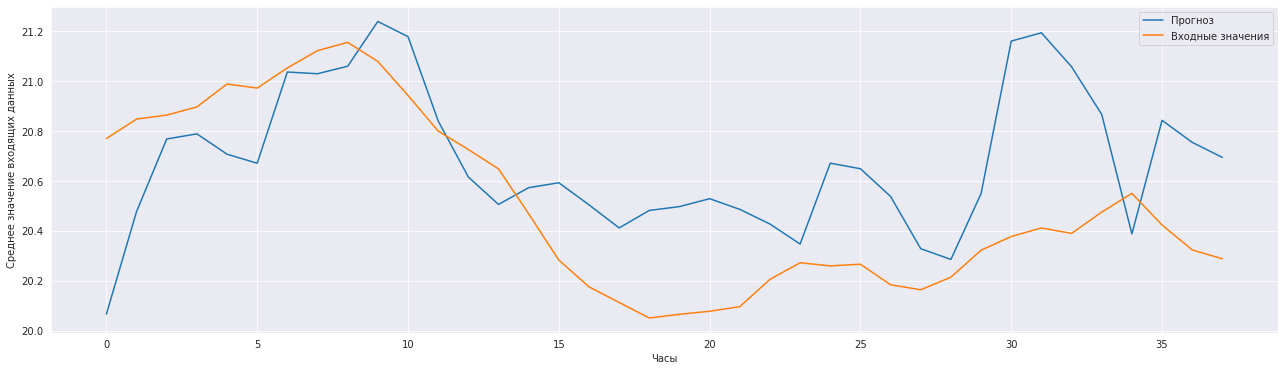

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelD_2, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 40, 0, predVal, yValUnscaled) # Параметр 40 - это сколько шагов отображаем 


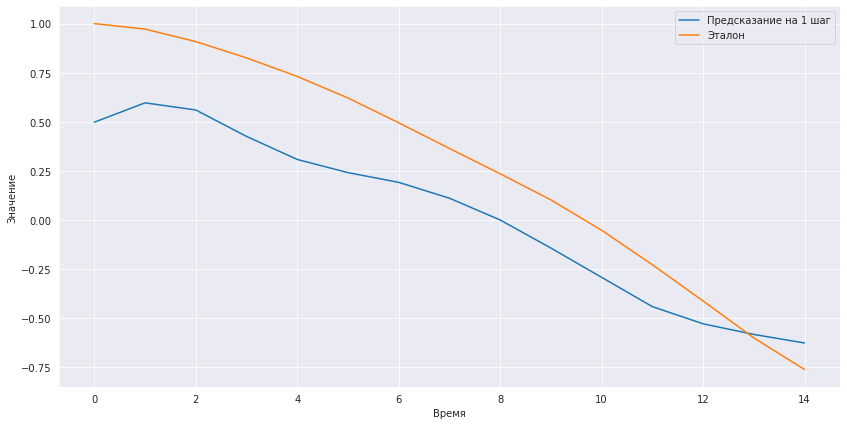

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 15, predVal, yValUnscaled)